In [39]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [40]:
data = pd.read_csv('../data/international-airline-passengers.csv', engine='python', skipfooter=3)
data.columns = ['Month','#Passengers']
data['Month'] = pd.to_datetime(data['Month'],format='%Y-%m')
data.set_index('Month', inplace=True)
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [41]:
data.dtypes

#Passengers    int64
dtype: object

In [42]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [43]:
ts = data['#Passengers']

In [44]:
train_size = int(len(ts) * 0.67)
test_size = len(ts) - train_size
train, test = ts[0:train_size], ts[train_size:len(ts)]
print(train.head(), len(train))
print(test.head(), len(test), type(test))

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64 96
Month
1957-01-01    315
1957-02-01    301
1957-03-01    356
1957-04-01    348
1957-05-01    355
Name: #Passengers, dtype: int64 48 <class 'pandas.core.series.Series'>


### Estimating & Eliminating Trend

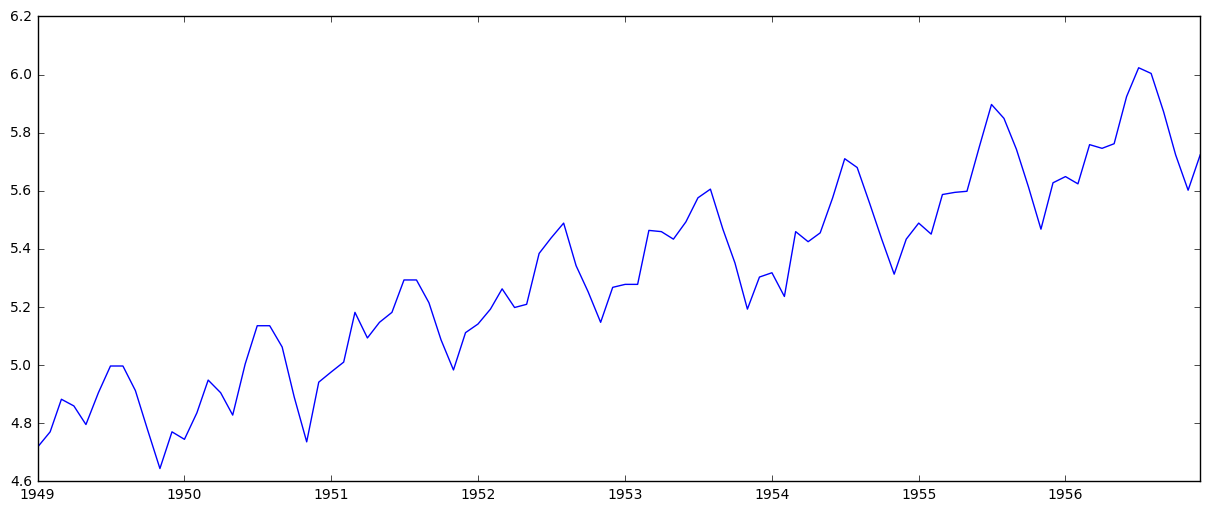

In [45]:
train_log = np.log(train)
plt.plot(train_log)

### Diferencing

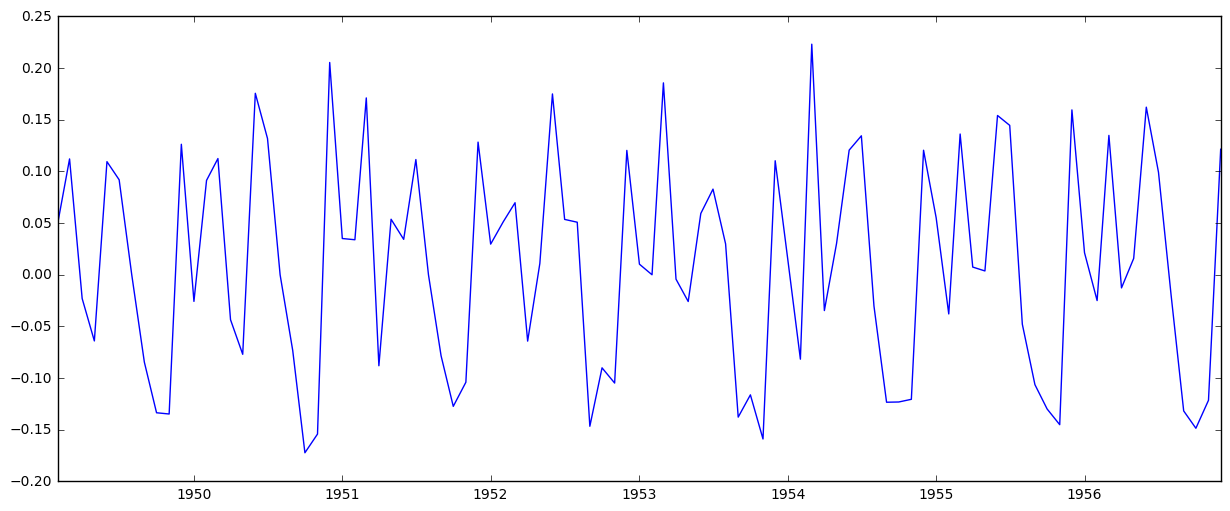

In [46]:
train_log_diff = train_log - train_log.shift(1)
train_log_diff.dropna(inplace=True)
plt.plot(train_log_diff)

In [47]:
len(train_log_diff)

95

In [48]:
import statsmodels
print(statsmodels.__version__)

print(pd.__version__)

0.6.1
0.18.1


### ARIMA Model

In [49]:
from statsmodels.tsa.arima_model import ARIMA

In [50]:
train_log

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
1949-06-01    4.905275
1949-07-01    4.997212
1949-08-01    4.997212
1949-09-01    4.912655
1949-10-01    4.779123
1949-11-01    4.644391
1949-12-01    4.770685
1950-01-01    4.744932
1950-02-01    4.836282
1950-03-01    4.948760
1950-04-01    4.905275
1950-05-01    4.828314
1950-06-01    5.003946
1950-07-01    5.135798
1950-08-01    5.135798
1950-09-01    5.062595
1950-10-01    4.890349
1950-11-01    4.736198
1950-12-01    4.941642
1951-01-01    4.976734
1951-02-01    5.010635
1951-03-01    5.181784
1951-04-01    5.093750
1951-05-01    5.147494
1951-06-01    5.181784
                ...   
1954-07-01    5.710427
1954-08-01    5.680173
1954-09-01    5.556828
1954-10-01    5.433722
1954-11-01    5.313206
1954-12-01    5.433722
1955-01-01    5.488938
1955-02-01    5.451038
1955-03-01    5.587249
1955-04-01    5.594711
1955-05-01    5.598422
1955-06-01    5.752573
1955-

In [51]:
train_log.dropna(inplace=True)
train_log.shape


(96,)

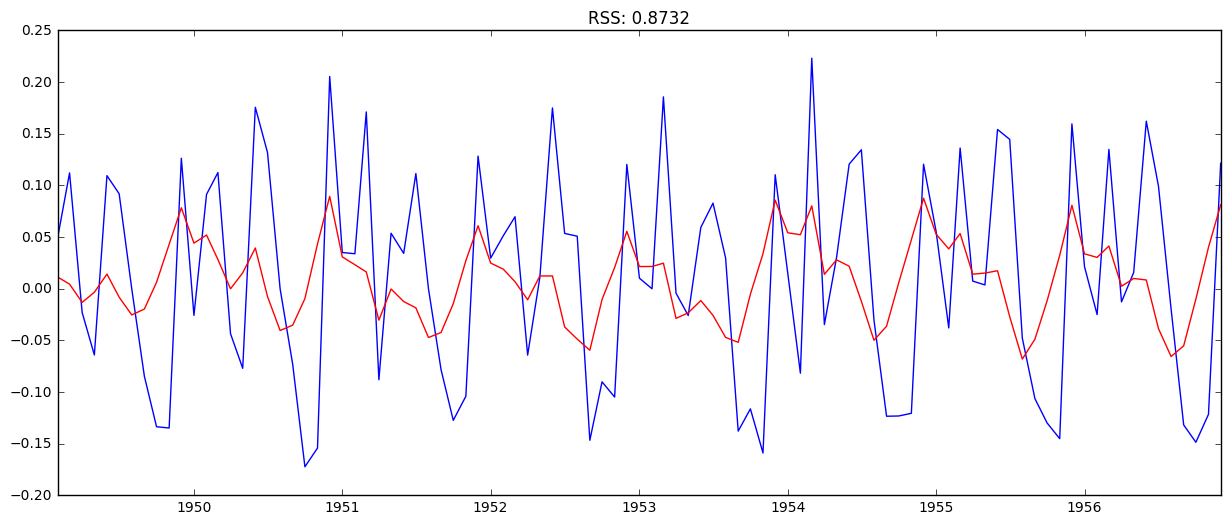

In [52]:
model = ARIMA(train_log, order=(1,1,1))
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-train_log_diff)**2))

### Converting to original scale

In [53]:
len(results_ARIMA.fittedvalues)

95

In [54]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Month
1949-02-01    0.011083
1949-03-01    0.004456
1949-04-01   -0.013174
1949-05-01   -0.003385
1949-06-01    0.014243
dtype: float64

In [55]:
predictions_ARIMA_diff

Month
1949-02-01    0.011083
1949-03-01    0.004456
1949-04-01   -0.013174
1949-05-01   -0.003385
1949-06-01    0.014243
1949-07-01   -0.008151
1949-08-01   -0.025287
1949-09-01   -0.019641
1949-10-01    0.006280
1949-11-01    0.043065
1949-12-01    0.078387
1950-01-01    0.044195
1950-02-01    0.052006
1950-03-01    0.028286
1950-04-01   -0.000023
1950-05-01    0.015420
1950-06-01    0.039452
1950-07-01   -0.007472
1950-08-01   -0.040408
1950-09-01   -0.035165
1950-10-01   -0.009497
1950-11-01    0.043404
1950-12-01    0.089420
1951-01-01    0.030864
1951-02-01    0.023267
1951-03-01    0.016262
1951-04-01   -0.030386
1951-05-01   -0.000217
1951-06-01   -0.012348
1951-07-01   -0.018467
                ...   
1954-07-01   -0.012093
1954-08-01   -0.049822
1954-09-01   -0.036222
1954-10-01    0.005933
1954-11-01    0.047461
1954-12-01    0.087661
1955-01-01    0.052806
1955-02-01    0.038607
1955-03-01    0.053422
1955-04-01    0.014121
1955-05-01    0.015206
1955-06-01    0.017441
1955-

In [56]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Month
1949-02-01    0.011083
1949-03-01    0.015539
1949-04-01    0.002365
1949-05-01   -0.001020
1949-06-01    0.013223
dtype: float64

In [57]:
predictions_ARIMA_diff_cumsum

Month
1949-02-01    0.011083
1949-03-01    0.015539
1949-04-01    0.002365
1949-05-01   -0.001020
1949-06-01    0.013223
1949-07-01    0.005073
1949-08-01   -0.020215
1949-09-01   -0.039856
1949-10-01   -0.033576
1949-11-01    0.009489
1949-12-01    0.087876
1950-01-01    0.132071
1950-02-01    0.184077
1950-03-01    0.212363
1950-04-01    0.212340
1950-05-01    0.227760
1950-06-01    0.267212
1950-07-01    0.259740
1950-08-01    0.219332
1950-09-01    0.184167
1950-10-01    0.174669
1950-11-01    0.218074
1950-12-01    0.307493
1951-01-01    0.338357
1951-02-01    0.361624
1951-03-01    0.377886
1951-04-01    0.347500
1951-05-01    0.347282
1951-06-01    0.334935
1951-07-01    0.316468
                ...   
1954-07-01    0.519316
1954-08-01    0.469494
1954-09-01    0.433272
1954-10-01    0.439205
1954-11-01    0.486666
1954-12-01    0.574327
1955-01-01    0.627133
1955-02-01    0.665740
1955-03-01    0.719162
1955-04-01    0.733283
1955-05-01    0.748489
1955-06-01    0.765930
1955-

In [58]:
predictions_ARIMA_log = pd.Series(train_log.ix[0], index=train_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.729582
1949-03-01    4.734038
1949-04-01    4.720863
1949-05-01    4.717479
dtype: float64

In [59]:
a = pd.Series(train_log.ix[0], index=train_log.index)
a

Month
1949-01-01    4.718499
1949-02-01    4.718499
1949-03-01    4.718499
1949-04-01    4.718499
1949-05-01    4.718499
1949-06-01    4.718499
1949-07-01    4.718499
1949-08-01    4.718499
1949-09-01    4.718499
1949-10-01    4.718499
1949-11-01    4.718499
1949-12-01    4.718499
1950-01-01    4.718499
1950-02-01    4.718499
1950-03-01    4.718499
1950-04-01    4.718499
1950-05-01    4.718499
1950-06-01    4.718499
1950-07-01    4.718499
1950-08-01    4.718499
1950-09-01    4.718499
1950-10-01    4.718499
1950-11-01    4.718499
1950-12-01    4.718499
1951-01-01    4.718499
1951-02-01    4.718499
1951-03-01    4.718499
1951-04-01    4.718499
1951-05-01    4.718499
1951-06-01    4.718499
                ...   
1954-07-01    4.718499
1954-08-01    4.718499
1954-09-01    4.718499
1954-10-01    4.718499
1954-11-01    4.718499
1954-12-01    4.718499
1955-01-01    4.718499
1955-02-01    4.718499
1955-03-01    4.718499
1955-04-01    4.718499
1955-05-01    4.718499
1955-06-01    4.718499
1955-

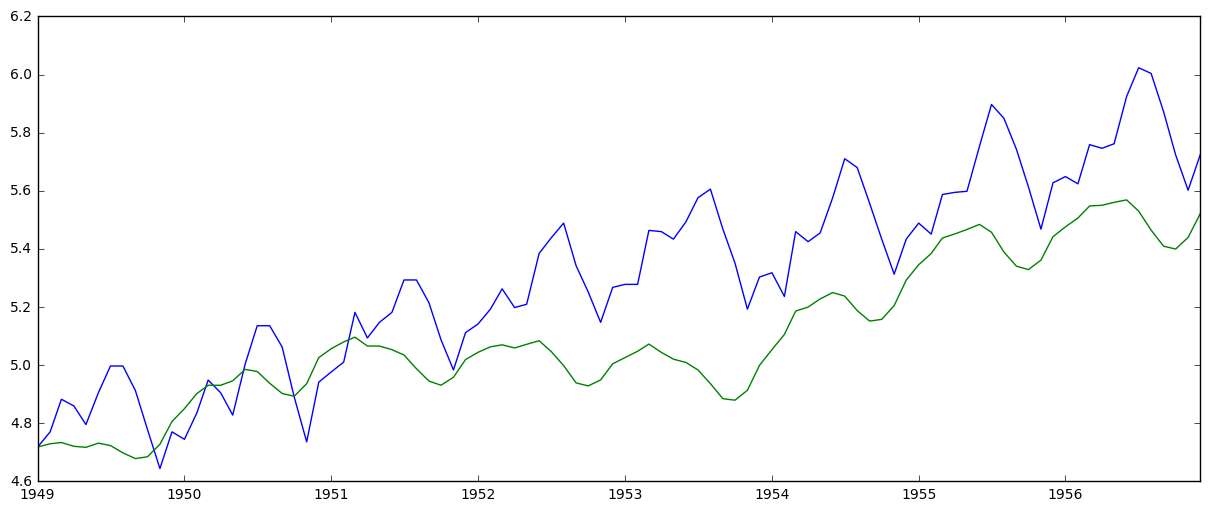

In [60]:
plt.plot(train_log)
plt.plot(predictions_ARIMA_log)

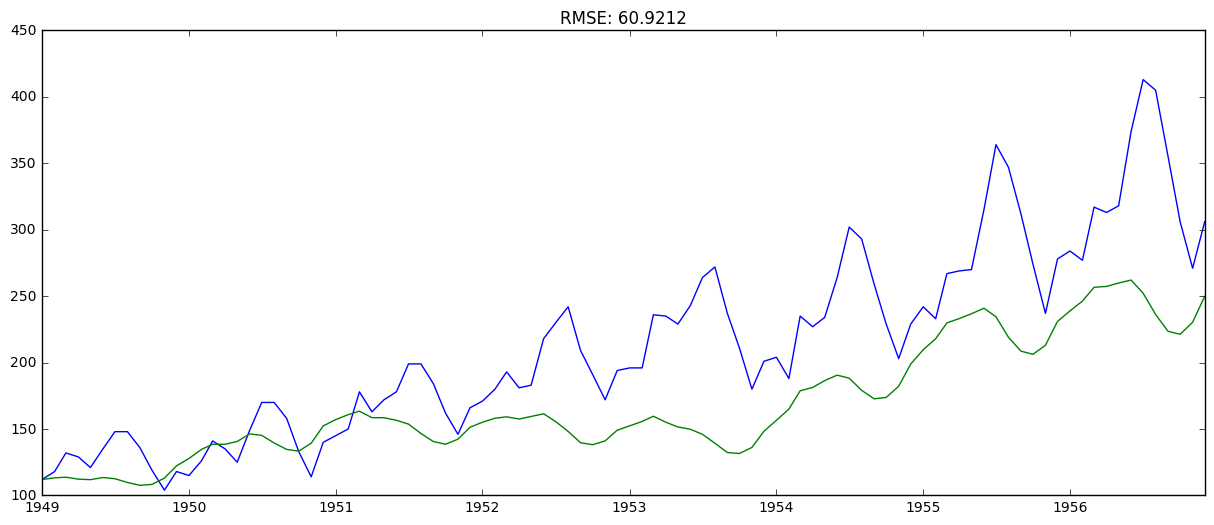

In [61]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(train)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-train)**2)/len(train)))

### Predicting

In [62]:
results_ARIMA

In [68]:
test_forecast_diff = results_ARIMA.predict(start=96, end=143, dynamic=True)

/Users/santiago/anaconda/lib/python3.5/site-packages/statsmodels/base/data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


In [69]:
test_forecast_diff_cumsum = test_forecast_diff.cumsum()

In [70]:
print(len(train_log))
train_log.ix[(len(train_log) - 1)]

96


5.7235851019523807

In [72]:
test_log = np.log(test)

In [73]:
test_forecast_ARIMA_log = pd.Series(train_log.ix[(len(train_log) - 1)], index=test_log.index)
test_forecast_ARIMA_log = test_forecast_ARIMA_log.add(test_forecast_diff_cumsum,fill_value=0)
test_forecast_ARIMA = np.exp(test_forecast_ARIMA_log)
test_forecast_ARIMA

Month
1957-01-01    320.293951
1957-02-01    331.539195
1957-03-01    340.597018
1957-04-01    348.116240
1957-05-01    354.569880
1957-06-01    360.295690
1957-07-01    365.531627
1957-08-01    370.443886
1957-09-01    375.147902
1957-10-01    379.723580
1957-11-01    384.226138
1957-12-01    388.693716
1958-01-01    393.152681
1958-02-01    397.621300
1958-03-01    402.112274
1958-04-01    406.634491
1958-05-01    411.194216
1958-06-01    415.795925
1958-07-01    420.442867
1958-08-01    425.137449
1958-09-01    429.881510
1958-10-01    434.676494
1958-11-01    439.523581
1958-12-01    444.423773
1959-01-01    449.377948
1959-02-01    454.386906
1959-03-01    459.451392
1959-04-01    464.572116
1959-05-01    469.749770
1959-06-01    474.985031
1959-07-01    480.278571
1959-08-01    485.631059
1959-09-01    491.043167
1959-10-01    496.515569
1959-11-01    502.048943
1959-12-01    507.643973
1960-01-01    513.301349
1960-02-01    519.021769
1960-03-01    524.805935
1960-04-01    530.6

In [74]:
test_df = pd.DataFrame(test)
test_df['forecast'] = test_forecast_ARIMA
test_df

,#Passengers,forecast
Month,,
1957-01-01,315,320.293951
1957-02-01,301,331.539195
1957-03-01,356,340.597018
1957-04-01,348,348.116240
1957-05-01,355,354.569880
1957-06-01,422,360.295690
1957-07-01,465,365.531627
1957-08-01,467,370.443886
1957-09-01,404,375.147902


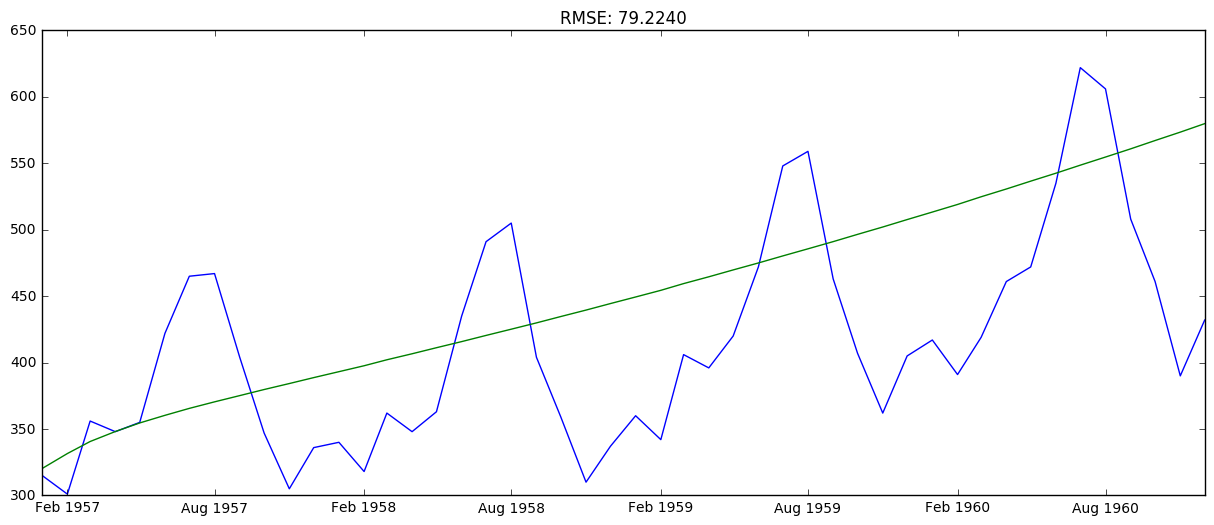

In [75]:
plt.plot(test_df)
plt.title('RMSE: %.4f'% np.sqrt(sum((test_df['forecast']-test_df['#Passengers'])**2)/len(test_df)))

In [76]:
print(np.__version__)

1.11.1
